In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neo.core import CircularRegionOfInterest, RectangularRegionOfInterest, PolygonRegionOfInterest
from numpy.random import rand

from neo.core import ImageSequence
from neo.core import RectangularRegionOfInterest, CircularRegionOfInterest, PolygonRegionOfInterest
import matplotlib.pyplot as plt
import quantities as pq

import random

from neo import io
import quantities as pq

### Example of working with RegionOfInterest objects

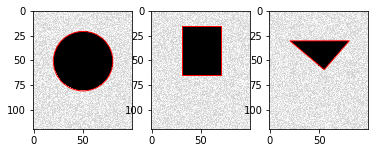

In [2]:
def plot_roi(roi, shape):
    img = rand(120, 100)
    pir = np.array(roi.pixels_in_region()).T
    img[pir[1], pir[0]] = 5

    plt.imshow(img, cmap='gray_r')
    plt.clim(0, 5)

    ax = plt.gca()
    ax.add_artist(shape)


roi = CircularRegionOfInterest(x=50.3, y=50.8, radius=30.2)
shape = plt.Circle(roi.centre, roi.radius, color='r', fill=False)
plt.subplot(1, 3, 1)
plot_roi(roi, shape)

roi = RectangularRegionOfInterest(x=50.3, y=40.2, width=40.1, height=50.3)
shape = plt.Rectangle((roi.x - roi.width/2.0, roi.y - roi.height/2.0),
                      roi.width, roi.height, color='r', fill=False)
plt.subplot(1, 3, 2)
plot_roi(roi, shape)

roi = PolygonRegionOfInterest(
    (20.3, 30.2), (80.7, 30.1), (55.2, 59.4)
)
shape = plt.Polygon(np.array(roi.vertices), closed=True, color='r', fill=False)
plt.subplot(1, 3, 3)
plot_roi(roi, shape)

plt.show()

### Example of Image sequence

<Figure size 432x288 with 0 Axes>

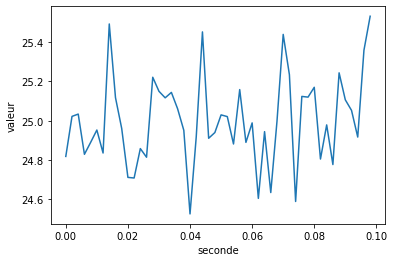

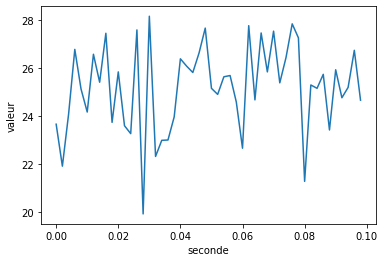

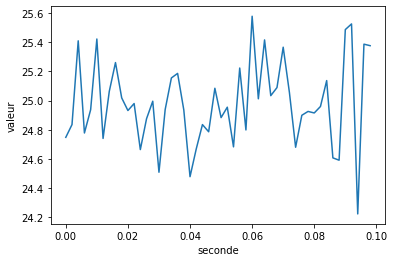

In [3]:
l = []
for frame in range(50):
    l.append([])
    for y in range(100):
        l[frame].append([])
        for x in range(100):
            l[frame][y].append(random.randint(0, 50))

image_seq = ImageSequence(l, sampling_rate=500 * pq.Hz, spatial_scale='m', units='V')

result = image_seq.signal_from_region(CircularRegionOfInterest(50, 50, 25),
                                      CircularRegionOfInterest(10, 10, 5),
                                      PolygonRegionOfInterest((50, 25), (50, 45), (14, 65),
                                                              (90, 80)))

fig = plt.figure()

for i in range(len(result)):
    plt.figure()
    plt.plot(result[i].times, result[i])
    plt.xlabel("seconde")
    plt.ylabel("valeur")
    
    plt.savefig('dir_tiff/image_seg_%s.tiff' %i)
plt.show()

### Neo Io module for optical imaging data stored as a folder of TIFF images

In [4]:
r = io.TiffIO(
              "dir_tiff",
              spatial_scale=1.0*pq.mm, #
              units='V', #
              sampling_rate=1.0*pq.Hz #
             )

print("r = ", r)

r =  <neo.io.tiffio.TiffIO object at 0x7f8a1f6b1710>


In [5]:
block = r.read_block()

read block
creating segment
returning block


In [6]:
block

Block with 1 segments
file_origin: 'dir_tiff'
# segments (N=1)
0: Segment with 1 imagesequences
   annotations: {'tiff_file_names': ['image_seg_0.tiff',
      'image_seg_1.tiff',
      'image_seg_2.tiff',
      'img_mask1_nwb.tiff']}
   # analogsignals (N=0)